<a href="https://colab.research.google.com/github/vargopal/stockMarket/blob/F455--Quant-Finance/Class3MyNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 16.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [3]:
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

pdr.get_data_yahoo('AAPL')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12 00:00:00-05:00,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1980-12-15 00:00:00-05:00,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1980-12-16 00:00:00-05:00,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
1980-12-17 00:00:00-05:00,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
1980-12-18 00:00:00-05:00,0.118862,0.119420,0.118862,0.118862,0.092492,73449600
...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,130.470001,133.410004,129.889999,130.149994,130.149994,70790800
2023-01-10 00:00:00-05:00,130.259995,131.259995,128.119995,130.729996,130.729996,63896200
2023-01-11 00:00:00-05:00,131.250000,133.509995,130.460007,133.490005,133.490005,69458900


In [16]:
# Get the data for the SPDR S&P 500 Fund
spy = pdr.get_data_yahoo('SPY')

# Trading day return
spy['otc']= spy['Close']/spy['Open'] -1

# Close to open return (overnight return)
# Shift function helps in a time series data
spy['cto']= spy['Open']/spy['Close'].shift() - 1


# Close to close return and compare with previous two return functions
spy['ret']= spy['Close']/spy['Close'].shift()-1

# Incorrect aggregation of otc and cto
#spy['otc']+ spy['cto']


# Calculating volatility
spy[['ret','otc','cto']].std()


spy.head()

[*********************100%***********************]  1 of 1 completed


ret    0.011946
otc    0.009739
cto    0.006766
dtype: float64

In [17]:
from scipy.special import binom

for n in [1, 3, 5, 10, 25]:
    print('{}:\t{}'.format(n, [int(binom(n, k)) for k in range(n+1)]))

1:	[1, 1]
3:	[1, 3, 3, 1]
5:	[1, 5, 10, 10, 5, 1]
10:	[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]
25:	[1, 25, 300, 2300, 12650, 53130, 177100, 480700, 1081575, 2042975, 3268760, 4457400, 5200300, 5200300, 4457400, 3268760, 2042975, 1081575, 480700, 177100, 53130, 12650, 2300, 300, 25, 1]


#Playing around with data
#pdr.get_data_yahoo('SPY', '2016-03-01')

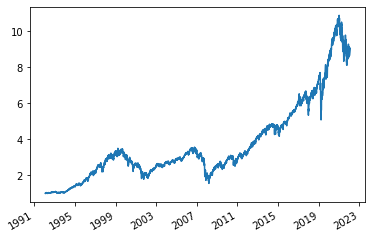

In [19]:
import matplotlib.pyplot as plt
ax = (1 + spy['ret'].fillna(0)).cumprod().plot(xlabel ='')
plt.show()